In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pymc3 as pm
import math as m

import dive
import matplotlib.pyplot as plt
import deerlab as dl


In [5]:
# r vector
r = np.linspace(2,8,150)
dr = r[1] - r[0]

t = np.linspace(-0.1,2.5,200)

k = 0.1
lamb = 0.5
V0 = 1

In [6]:
L = dl.regoperator(np.linspace(1,len(r),len(r)), 2)

#kernels
K0 = dl.dipolarkernel(t,r,integralop=False)   # kernel matrix
B = dl.bg_exp(t,k) 
Kintra = (1-lamb)+lamb*K0
K = Kintra * B[:, np.newaxis]
K = V0*K*dr

In [7]:
LtL = np.matmul(np.transpose(L),L)
K0tK0 = np.matmul(np.transpose(K0)*dr,K0*dr)
KtK = np.matmul(np.transpose(K),K)

In [22]:
invSigma = KtK + LtL
invSigma0 = K0tK0 + LtL

Sigma = np.linalg.inv(invSigma)
Sigma0 = np.linalg.inv(invSigma0)

SigmaKtK = np.linalg.inv(KtK)
SigmaK0tK0 = np.linalg.inv(K0tK0)

SigmaLtL = np.linalg.inv(LtL)

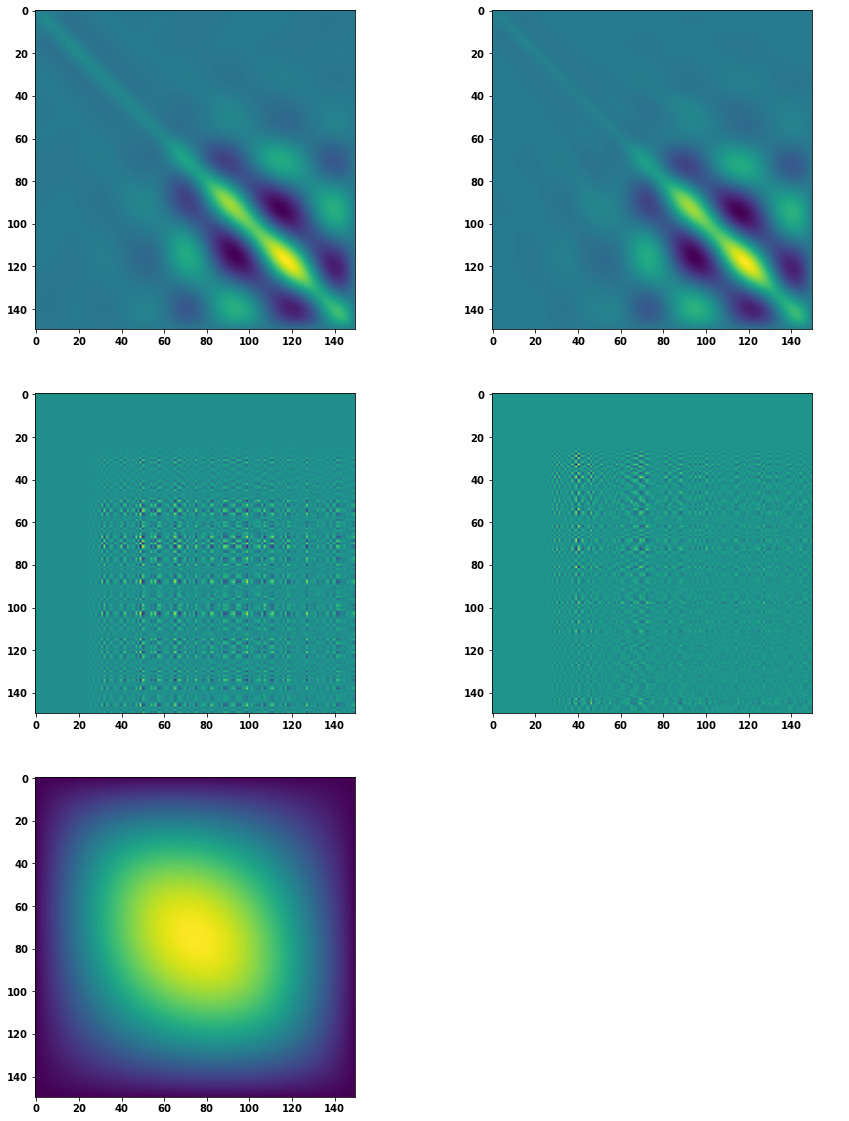

In [28]:
fig, axs = plt.subplots(3, 2)
    
fig.set_figheight(20)
fig.set_figwidth(15)

axs[0,0].imshow(Sigma)
axs[0,1].imshow(Sigma0)
axs[1,0].imshow(SigmaKtK)
axs[1,1].imshow(SigmaK0tK0)
axs[2,0].imshow(SigmaLtL)

axs[2, 1].axis('off')

plt.show()